# Crime Data Analysis: Patterns, Insights, and Prevention Strategies

## Import libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

## Extract data

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/steve-mdc/DQLab/refs/heads/main/Crime_Data2024.csv")

## Show Data Headings

In [ ]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,241012185,11/09/2024 12:00:00 AM,11/09/2024 12:00:00 AM,1242,10,West Valley,1079,1,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),...,IC,Invest Cont,442,NaN,NaN,NaN,15600 VENTURA BL,NaN,34.1599,-118.4766
1,240114625,07/08/2024 12:00:00 AM,07/05/2024 12:00:00 AM,1200,1,Central,164,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745,NaN,NaN,NaN,600 S MAIN ST,NaN,34.0453,-118.2499
2,241109459,07/22/2024 12:00:00 AM,07/21/2024 12:00:00 AM,1930,11,Northeast,1118,2,888,TRESPASSING,...,AA,Adult Arrest,888,NaN,NaN,NaN,100 N AVENUE 57,NaN,34.1096,-118.1928
3,241507168,01/21/2024 12:00:00 AM,01/21/2024 12:00:00 AM,1145,15,N Hollywood,1591,1,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),...,IC,Invest Cont,442,NaN,NaN,NaN,4200 COLDWATER CANYON AV,NaN,34.1451,-118.4137
4,241804890,01/20/2024 12:00:00 AM,01/19/2024 12:00:00 AM,1930,18,Southeast,1862,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,IC,Invest Cont,420,NaN,NaN,NaN,100 E 118TH ST,NaN,33.9265,-118.2739


## Show Data Structure

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50007 entries, 0 to 50006
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DR_NO           50007 non-null  int64  
 1   Date Rptd       50007 non-null  object 
 2   DATE OCC        50007 non-null  object 
 3   TIME OCC        50007 non-null  int64  
 4   AREA            50007 non-null  int64  
 5   AREA NAME       50007 non-null  object 
 6   Rpt Dist No     50007 non-null  int64  
 7   Part 1-2        50007 non-null  int64  
 8   Crm Cd          50007 non-null  int64  
 9   Crm Cd Desc     50007 non-null  object 
 10  Mocodes         38244 non-null  object 
 11  Vict Age        50007 non-null  int64  
 12  Vict Sex        38569 non-null  object 
 13  Vict Descent    38568 non-null  object 
 14  Premis Cd       50007 non-null  int64  
 15  Premis Desc     49991 non-null  object 
 16  Weapon Used Cd  9508 non-null   float64
 17  Weapon Desc     9508 non-null  

## Identify Columns with Missing Values

In [ ]:
# Identify columns with missing values
missing_columns = df.columns[df.isnull().any()]

# Display columns and their count of missing values
for col in missing_columns:
    missing_count = df[col].isnull().sum()
    print(f"{col}: {missing_count} missing values")

Mocodes: 11763 missing values
Vict Sex: 11438 missing values
Vict Descent: 11439 missing values
Premis Desc: 16 missing values
Weapon Used Cd: 40499 missing values
Weapon Desc: 40499 missing values
Crm Cd 2: 48028 missing values
Crm Cd 3: 49951 missing values
Crm Cd 4: 50007 missing values
Cross Street: 43906 missing values


## Treatment of Missing Values

In [ ]:
df['Mocodes'].fillna('UNKNOWN', inplace=True)
df['Vict Sex'].fillna('UNKNOWN', inplace=True)
df['Vict Descent'].fillna('UNKNOWN', inplace=True)
df['Premis Cd'].fillna(df['Premis Cd'].mode()[0], inplace=True)
df['Premis Desc'].fillna('UNKNOWN', inplace=True)
df['Weapon Used Cd'].fillna('NO WEAPON', inplace=True)
df['Weapon Desc'].fillna('NO WEAPON', inplace=True)
df['Status'].fillna(df['Status'].mode()[0], inplace=True)
df['Crm Cd 1'].fillna(df['Crm Cd 1'].mode()[0], inplace=True)
df['Crm Cd 2'].fillna('NONE', inplace=True)
df['Crm Cd 3'].fillna('NONE', inplace=True)
df['Crm Cd 4'].fillna('NONE', inplace=True)
df['Cross Street'].fillna('UNKNOWN', inplace=True)

In [ ]:
# Identify columns with missing values
missing_columns = df.columns[df.isnull().any()]

# Display columns and their count of missing values
for col in missing_columns:
    missing_count = df[col].isnull().sum()
    print(f"{col}: {missing_count} missing values")

## Convert Data Types

In [ ]:
# Convert date from 'object' to 'datetime'
df['Date Rptd'] = pd.to_datetime(df['Date Rptd'])
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])

In [ ]:
# Add another column of time to seperate between hours and minutes using colon
df['TIME OCC1'] = df['TIME OCC'].astype(str).str.zfill(4).str[:2] + ":" + df['TIME OCC'].astype(str).str.zfill(4).str[2:]

In [ ]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,TIME OCC1
0,241012185,2024-11-09,2024-11-09,1242,10,West Valley,1079,1,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),...,Invest Cont,442,NONE,NONE,NONE,15600 VENTURA BL,UNKNOWN,34.1599,-118.4766,12:42
1,240114625,2024-07-08,2024-07-05,1200,1,Central,164,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,Invest Cont,745,NONE,NONE,NONE,600 S MAIN ST,UNKNOWN,34.0453,-118.2499,12:00
2,241109459,2024-07-22,2024-07-21,1930,11,Northeast,1118,2,888,TRESPASSING,...,Adult Arrest,888,NONE,NONE,NONE,100 N AVENUE 57,UNKNOWN,34.1096,-118.1928,19:30
3,241507168,2024-01-21,2024-01-21,1145,15,N Hollywood,1591,1,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),...,Invest Cont,442,NONE,NONE,NONE,4200 COLDWATER CANYON AV,UNKNOWN,34.1451,-118.4137,11:45
4,241804890,2024-01-20,2024-01-19,1930,18,Southeast,1862,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,Invest Cont,420,NONE,NONE,NONE,100 E 118TH ST,UNKNOWN,33.9265,-118.2739,19:30


## Standardizing Text Columns

In [ ]:
# List of columns to standardize
columns_to_clean = [
    'AREA NAME', 'Crm Cd Desc', 'Premis Desc',
    'Weapon Desc', 'Status Desc', 'Vict Sex',
    'Vict Descent', 'LOCATION', 'Cross Street'
]

# Apply cleaning: strip spaces, convert to uppercase
for col in columns_to_clean:
    df[col] = df[col].astype(str).str.strip().str.upper()

## Remove Duplicates

In [ ]:
df = df.drop_duplicates()

## Descriptive Analysis — Summarize Crime Frequency

### Most common crime types

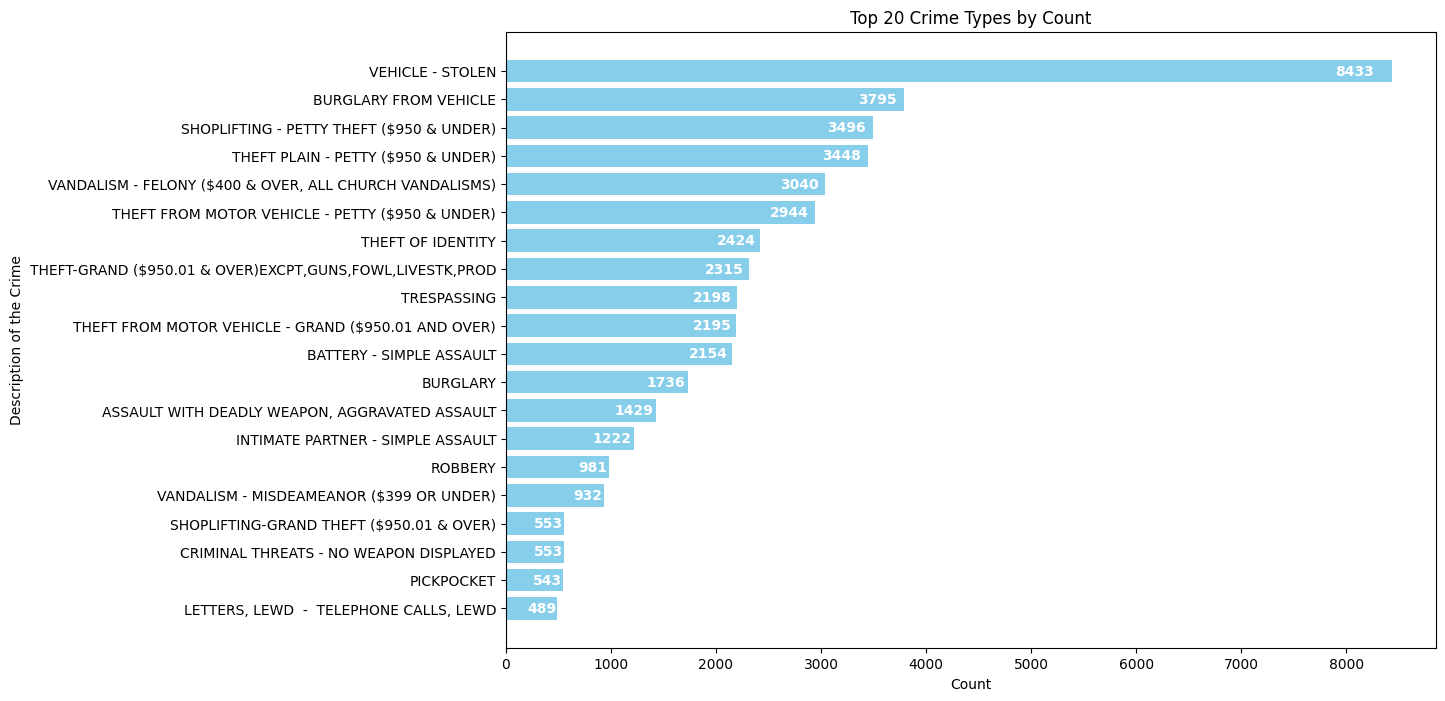

In [ ]:
import matplotlib.pyplot as plt

crime_by_type = df['Crm Cd Desc'].value_counts().head(20).sort_values(ascending=True)

plt.figure(figsize=(12, 8))
bars = plt.barh(crime_by_type.index, crime_by_type.values, color='skyblue')

plt.xlabel('Count')
plt.ylabel('Description of the Crime')
plt.title('Top 20 Crime Types by Count')

# Add value labels inside the bars
for bar in bars:
    width = bar.get_width()  # Get bar length (crime count)
    plt.text(width - (width * 0.02),  # x position (slightly to the left of the end of the bar)
             bar.get_y() + bar.get_height() / 2,  # y position (centered vertically)
             str(int(width)),  # the actual count
             ha='right',       # align text to the right
             va='center',       # vertically center text
             color='white',     # make text stand out
             fontsize=10,       # adjust font size
             fontweight='bold')  # optional for emphasis

# Save the chart
plt.savefig('pict_top_20_crime_types.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


### Most common crime times

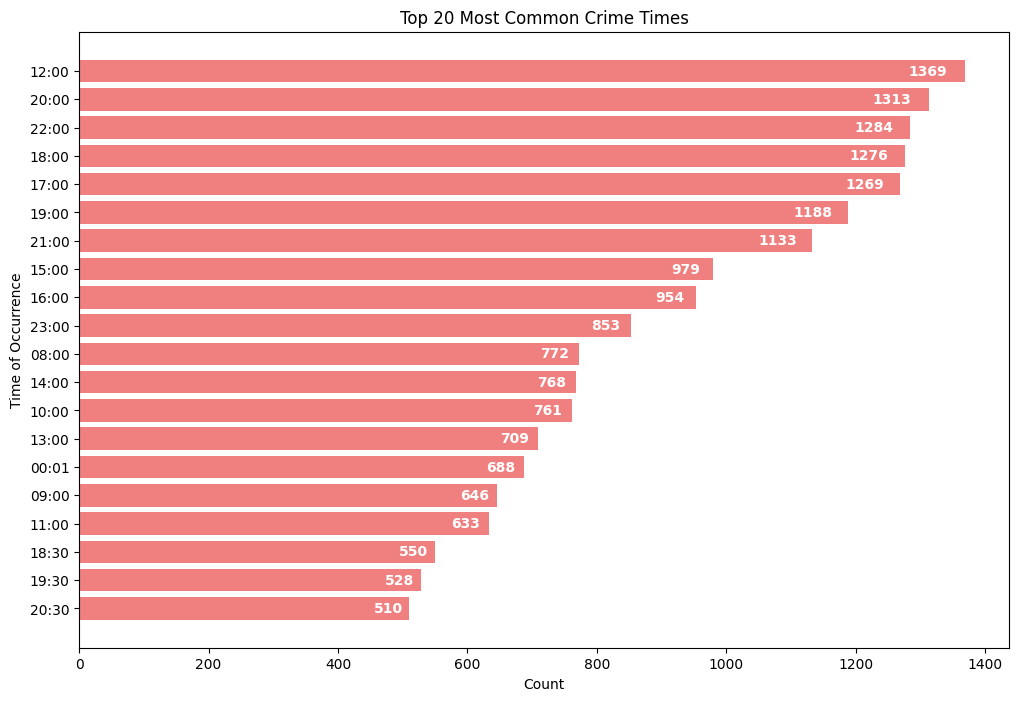

In [ ]:
# Get the top 20 most common times
time_by_occurrence = df['TIME OCC1'].value_counts().head(20).sort_values(ascending=True)

plt.figure(figsize=(12, 8))
bars = plt.barh(time_by_occurrence.index, time_by_occurrence.values, color='lightcoral')

plt.xlabel('Count')
plt.ylabel('Time of Occurrence')
plt.title('Top 20 Most Common Crime Times')

# Add value labels inside the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width - (width * 0.02),  # position text just inside the end of the bar
             bar.get_y() + bar.get_height() / 2,
             str(int(width)),
             ha='right',
             va='center',
             color='white',
             fontsize=10,
             fontweight='bold')

# Save the chart
plt.savefig('pict_top_20_crime_times.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


### Crime by Day of Week

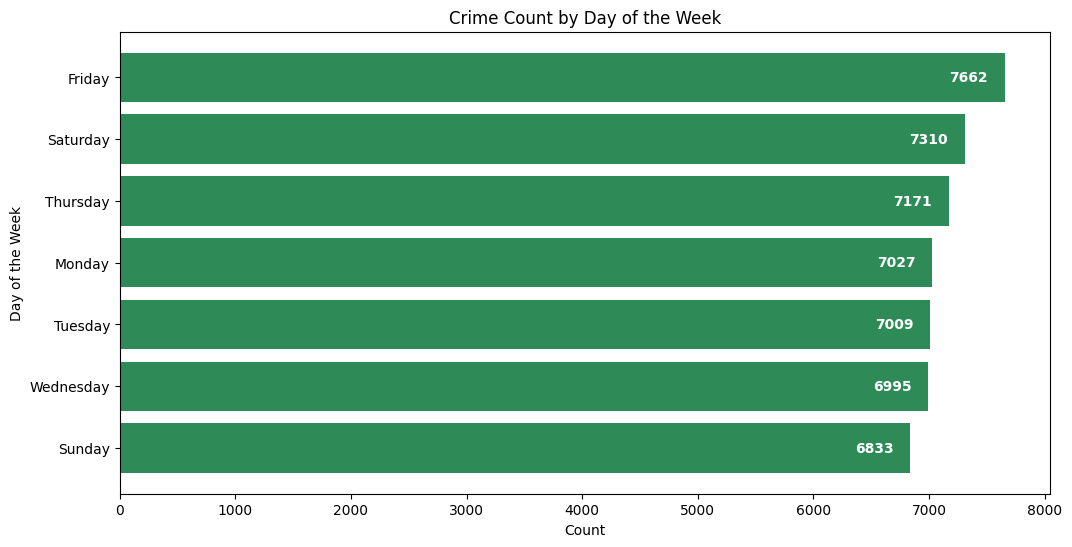

In [ ]:
# Extract day of the week (e.g., Monday, Tuesday)
df['Day of Week'] = df['DATE OCC'].dt.day_name()

# Count crimes by day of the week, then sort by count (highest to lowest)
crime_by_day = df['Day of Week'].value_counts().sort_values(ascending=True)

# Plot
plt.figure(figsize=(12, 6))
bars = plt.barh(crime_by_day.index, crime_by_day.values, color='seagreen')

plt.xlabel('Count')
plt.ylabel('Day of the Week')
plt.title('Crime Count by Day of the Week')

# Add value labels inside the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width - (width * 0.02),  # position text just inside the end of the bar
             bar.get_y() + bar.get_height() / 2,
             str(int(width)),
             ha='right',
             va='center',
             color='white',
             fontsize=10,
             fontweight='bold')

# Save the chart (optional)
plt.savefig('pict_crime_by_day_of_week', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


### Crime by Season

In [ ]:
# Create a Column called season from 'DATE OCC'
df['Season'] = pd.to_datetime(df['DATE OCC'])

# Function to map month to season
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# Create 'Season' column
df['Season'] = df['DATE OCC'].dt.month.map(get_season)


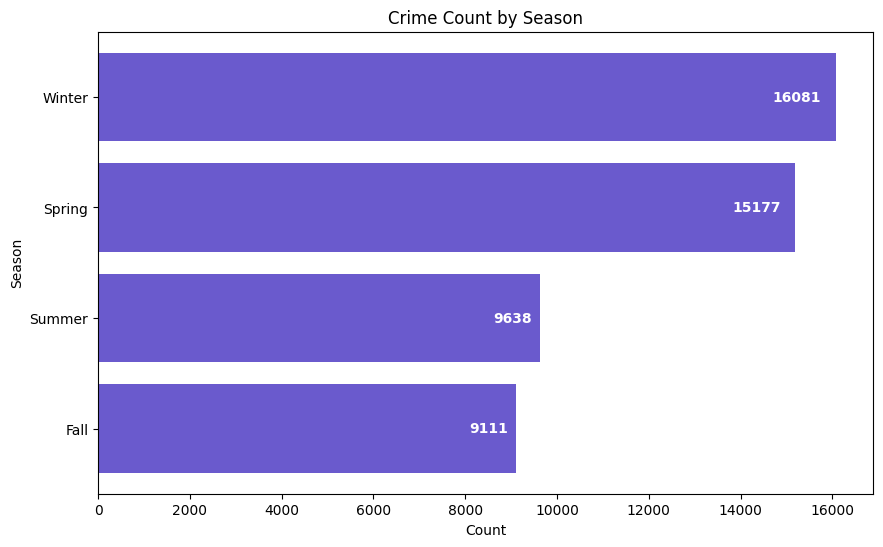

In [ ]:
# Count crimes by season
crime_by_season = df['Season'].value_counts()

# Sort if you want (optional)
crime_by_season = crime_by_season.sort_values(ascending=True)

# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(crime_by_season.index, crime_by_season.values, color='slateblue')

plt.xlabel('Count')
plt.ylabel('Season')
plt.title('Crime Count by Season')

# Add value labels inside bars
for bar in bars:
    width = bar.get_width()
    plt.text(width - (width * 0.02),
             bar.get_y() + bar.get_height() / 2,
             str(int(width)),
             ha='right',
             va='center',
             color='white',
             fontsize=10,
             fontweight='bold')

# Save the chart
plt.savefig('pict_crime_by_season.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


### Crime by Area

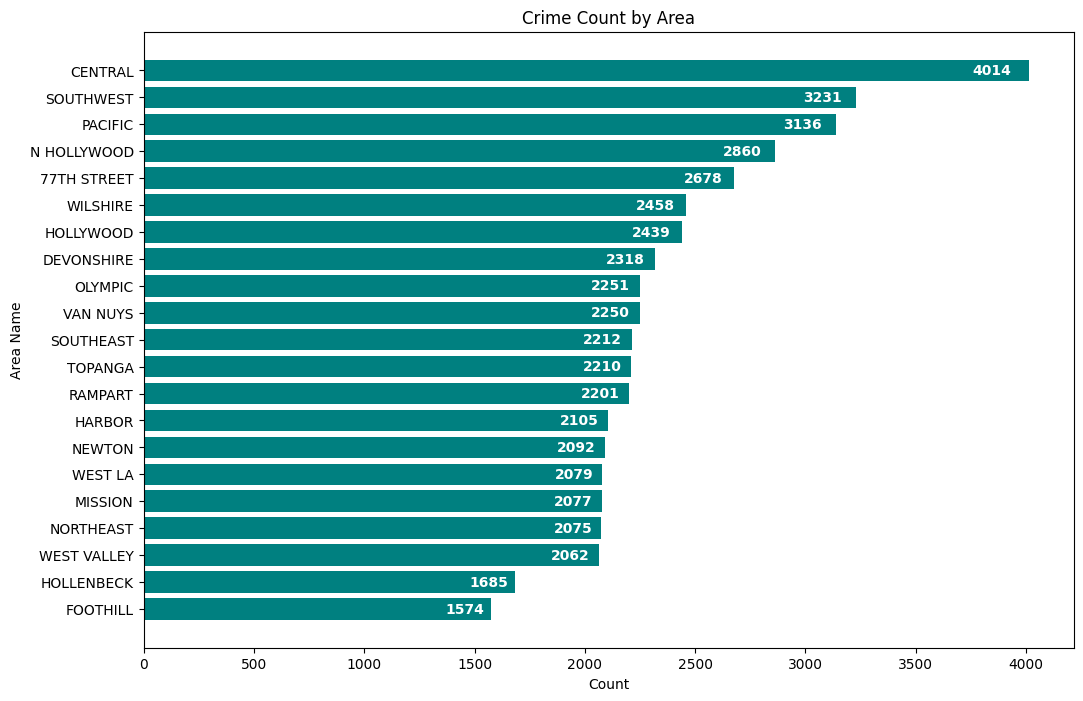

In [ ]:
# Count crimes by AREA NAME
crime_by_area = df['AREA NAME'].value_counts()

# Sort the areas by crime count (optional: ascending=False if you want the highest first)
crime_by_area = crime_by_area.sort_values(ascending=True)

# Plot
plt.figure(figsize=(12, 8))
bars = plt.barh(crime_by_area.index, crime_by_area.values, color='teal')

plt.xlabel('Count')
plt.ylabel('Area Name')
plt.title('Crime Count by Area')

# Add value labels inside the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width - (width * 0.02),  # position text just inside the end of the bar
             bar.get_y() + bar.get_height() / 2,
             str(int(width)),
             ha='right',
             va='center',
             color='white',
             fontsize=10,
             fontweight='bold')

# Save the chart
plt.savefig('pict_crime_by_area.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


### Victim Age Distribution

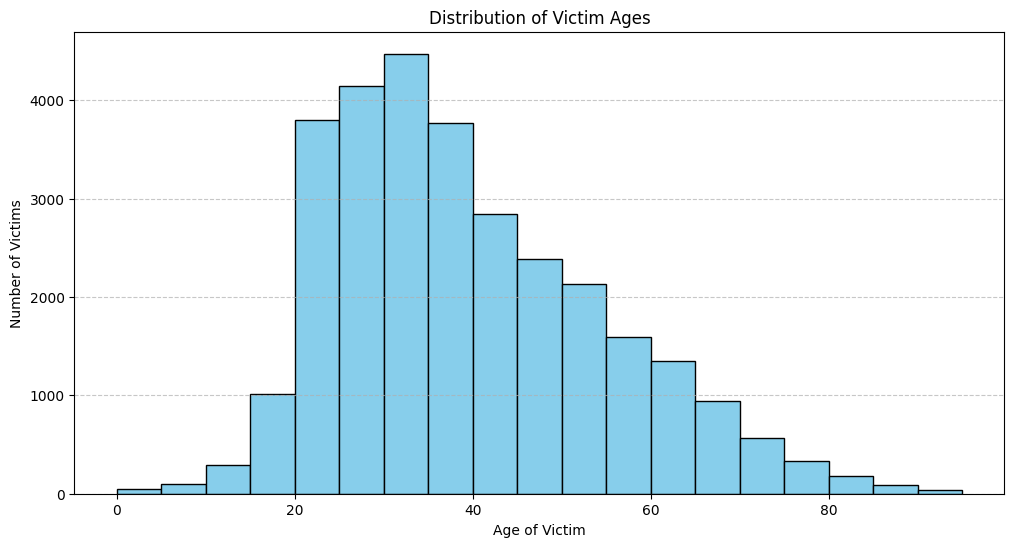

In [ ]:
# Filter out invalid ages (e.g., 0 or negative ages if present)
df = df[df['Vict Age'] > 0]

# Plot histogram
plt.figure(figsize=(12, 6))
plt.hist(df['Vict Age'], bins=range(0, 100, 5), color='skyblue', edgecolor='black')  # Bins of 5 years

# Add labels and title
plt.xlabel('Age of Victim')
plt.ylabel('Number of Victims')
plt.title('Distribution of Victim Ages')

# Optional: Grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Optional: Save chart
plt.savefig('pict_victim_age_distribution_histogram.png', dpi=300, bbox_inches='tight')

# Show plot
plt.show()


### Victim by Sex

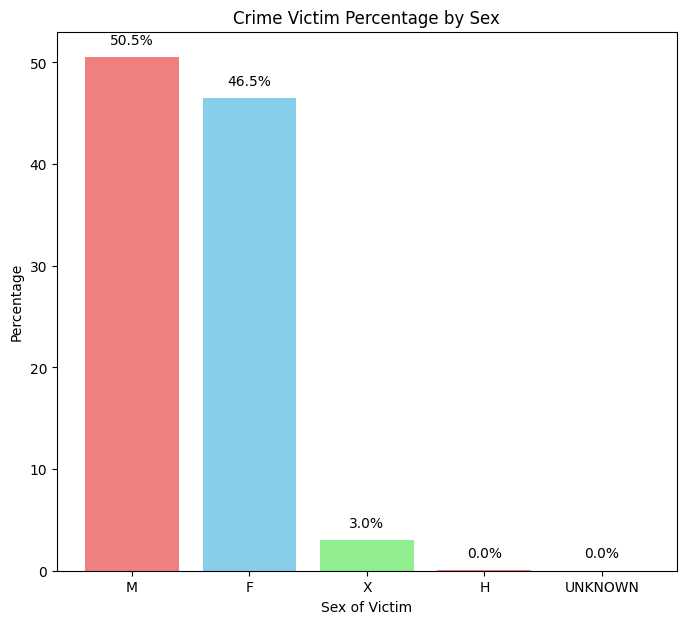

In [ ]:
# Count the number of victims by sex
victim_sex_count = df['Vict Sex'].value_counts()

# Calculate percentage
victim_sex_percentage = (victim_sex_count / victim_sex_count.sum()) * 100

# Plot bar chart
plt.figure(figsize=(8, 7))
bars = plt.bar(victim_sex_percentage.index, victim_sex_percentage.values, color=['lightcoral', 'skyblue', 'lightgreen'])

# Add labels
plt.xlabel('Sex of Victim')
plt.ylabel('Percentage')
plt.title('Crime Victim Percentage by Sex')

# Add percentage labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{height:.1f}%',
             ha='center', va='bottom', fontsize=10, color='black')

# Save chart
plt.savefig('pict_victim_percentage_by_sex.png', dpi=300, bbox_inches='tight')

# Show plot
plt.show()


### Victim by Race

In [ ]:
# Define mapping dictionary for Vict Descent to full race/ethnicity name
descent_mapping = {
    'H': 'Hispanic/Latino',
    'W': 'White',
    'B': 'Black/African American',
    'O': 'Other',
    'A': 'Asian',
    'X': 'Unknown',
    'K': 'Korean',
    'F': 'Filipino',
    'C': 'Chinese',
    'J': 'Japanese',
    'V': 'Vietnamese',
    'I': 'American Indian/Alaska Native',
    'Z': 'Middle Eastern/South Asian',
    'P': 'Pacific Islander',
    'U': 'Unable to Determine',
    'D': 'Cambodian',
    'L': 'Laotian',
    'G': 'Guamanian',
    'S': 'Samoan',
    'UNKNOWN': 'Unknown',
    '-': 'Not Recorded'
}

# Create new column 'Vict Race' using the mapping
df['Vict Race'] = df['Vict Descent'].map(descent_mapping)

# Optional: Check result
print(df[['Vict Descent', 'Vict Race']].drop_duplicates())


      Vict Descent                      Vict Race
1                B         Black/African American
5                H                Hispanic/Latino
7                W                          White
17               K                         Korean
25               O                          Other
53               A                          Asian
63               Z     Middle Eastern/South Asian
81               X                        Unknown
121              C                        Chinese
234              P               Pacific Islander
239              F                       Filipino
290              V                     Vietnamese
458              J                       Japanese
945        UNKNOWN                        Unknown
1725             I  American Indian/Alaska Native
2298             U            Unable to Determine
2976             S                         Samoan
15674            D                      Cambodian
16969            L                        Laotian


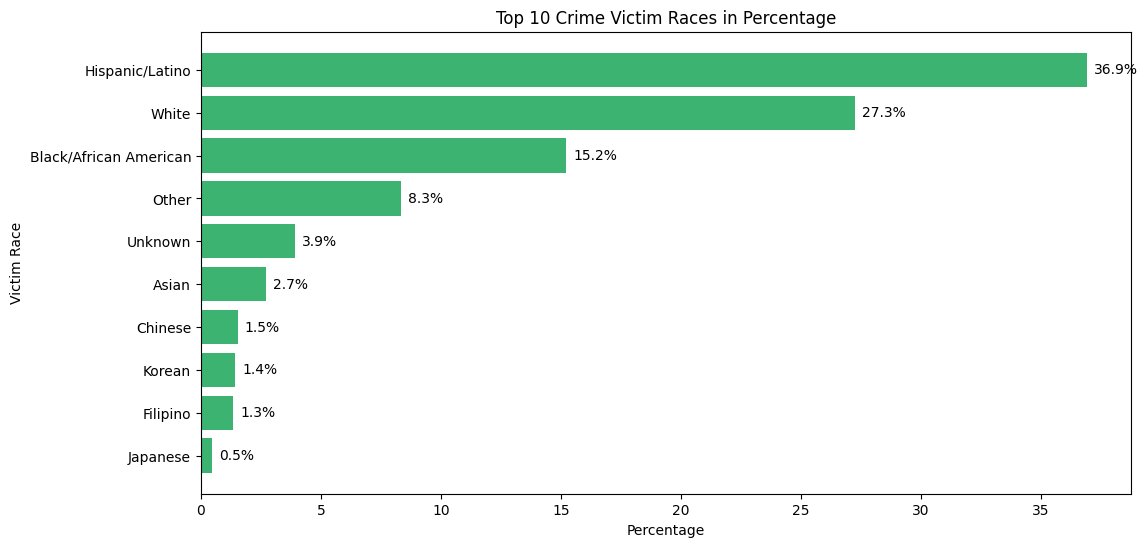

In [ ]:
# Count the number of victims by race
victim_race_count = df['Vict Race'].value_counts()

# Calculate percentage
victim_race_percentage = (victim_race_count / victim_race_count.sum()) * 100

# Filter out 0% entries
victim_race_percentage = victim_race_percentage[victim_race_percentage > 0]

# Sort and take the top 10 highest, then reverse to put highest at the top
victim_race_percentage = victim_race_percentage.sort_values(ascending=False).head(10).sort_values(ascending=True)

# Plot horizontal bar chart
plt.figure(figsize=(12, 6))
bars = plt.barh(victim_race_percentage.index, victim_race_percentage.values, color='mediumseagreen')

# Add labels
plt.xlabel('Percentage')
plt.ylabel('Victim Race')
plt.title('Top 10 Crime Victim Races in Percentage')

# Add percentage labels **just after the end of each bar**
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.3,  # slightly outside the bar
             bar.get_y() + bar.get_height() / 2,
             f'{width:.1f}%',
             ha='left',
             va='center',
             fontsize=10,
             color='black')

# Optional: Save chart
plt.savefig('pict_top_10_victim_percentage_by_race.png', dpi=300, bbox_inches='tight')

# Show plot
plt.show()


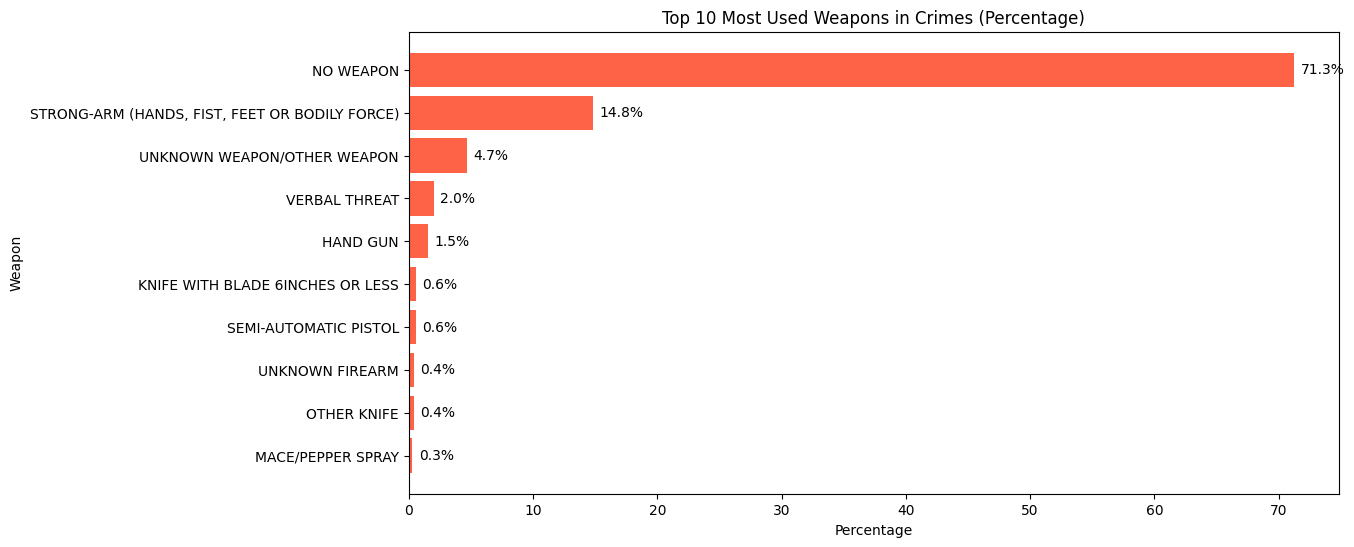

In [ ]:
# Count the number of occurrences for each weapon type and calculate percentage
weapon_percentage = (df['Weapon Desc'].value_counts(normalize=True) * 100).head(10).sort_values(ascending=True)

# Plot horizontal bar chart
plt.figure(figsize=(12, 6))
bars = plt.barh(weapon_percentage.index, weapon_percentage.values, color='tomato')

# Add labels and title
plt.xlabel('Percentage')
plt.ylabel('Weapon')
plt.title('Top 10 Most Used Weapons in Crimes (Percentage)')

# Add percentage labels outside the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5,  # slightly outside the bar
             bar.get_y() + bar.get_height() / 2,
             f'{width:.1f}%',
             ha='left',
             va='center',
             fontsize=10,
             color='black')

# Save the chart
plt.savefig('pict_top_10_weapons_percentage.png', dpi=300, bbox_inches='tight')

# Show plot
plt.show()


## Crime Pattern Over Time

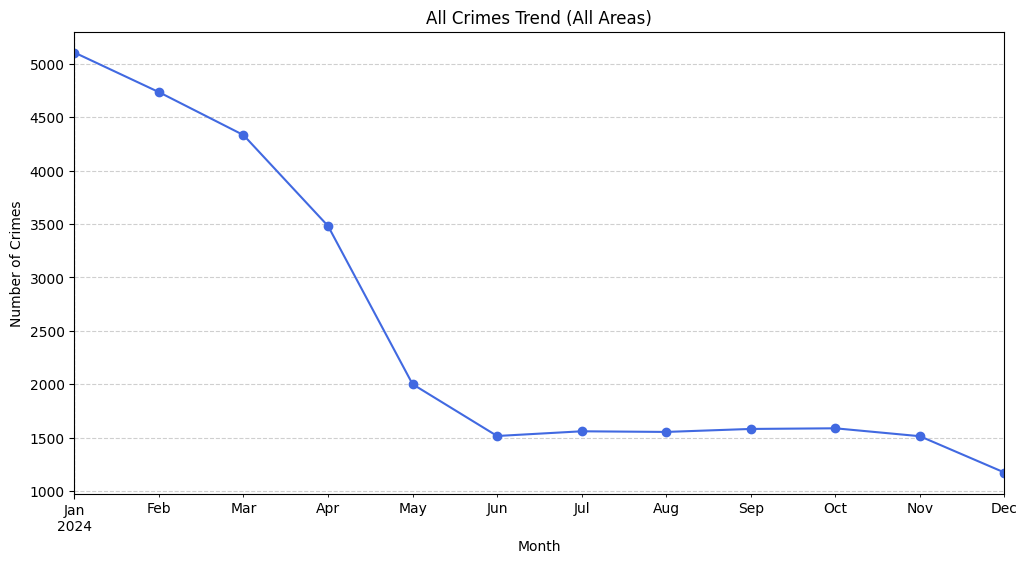

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure DATE OCC is datetime
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])

# ==== Parameters ====
time_unit = 'M'  # 'D' for daily, 'M' for monthly, 'Y' for yearly

selected_crime = None  # e.g., 'BATTERY - SIMPLE ASSAULT' or None for all crimes
selected_area = None  # e.g., 'HOLLYWOOD' or None for all areas
# ====================

# Filter data based on the selected crime and area
filtered_df = df.copy()
if selected_crime:
    filtered_df = filtered_df[filtered_df['Crm Cd Desc'] == selected_crime]
if selected_area:
    filtered_df = filtered_df[filtered_df['AREA NAME'] == selected_area]

# Group and count crimes over time
crime_trend = filtered_df.resample(time_unit, on='DATE OCC').size()

# Plot the trend
plt.figure(figsize=(12, 6))
crime_trend.plot(kind='line', color='royalblue', marker='o', linestyle='-')

# Add vertical lines at the start of each year
for year in filtered_df['DATE OCC'].dt.year.unique():
    plt.axvline(pd.Timestamp(f'{year}-01-01'), color='gray', linestyle='--', linewidth=0.8)

# Dynamic labels and title
time_label = {'D': 'Date', 'M': 'Month', 'Y': 'Year'}[time_unit]
crime_label = selected_crime if selected_crime else 'All Crimes'
area_label = f" in {selected_area}" if selected_area else " (All Areas)"
title = f"{crime_label} Trend{area_label}"

plt.xlabel(time_label)
plt.ylabel('Number of Crimes')
plt.title(title)

# Optional: Save chart
plt.savefig(f'pict_crime_trend_{time_unit}_{selected_crime}_{selected_area}.png', dpi=300, bbox_inches='tight')

# Show plot
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


# Pivot Table

In [ ]:
## Grouping Area into City Region

In [ ]:
area_to_region = {
    'Central': 'Central',
    'Rampart': 'Central',
    'Southwest': 'South',
    'Hollenbeck': 'East',
    'Harbor': 'South',
    'Hollywood': 'West',
    'Wilshire': 'West',
    'West LA': 'West',
    'Van Nuys': 'North',
    'West Valley': 'West',
    'Northeast': 'East',
    '77th Street': 'South',
    'Newton': 'South',
    'Pacific': 'West',
    'North Hollywood': 'North',
    'Foothill': 'North',
    'Devonshire': 'North',
    'Southeast': 'South',
    'Mission': 'North',
    'Olympic': 'Central',
    'Topanga': 'West',
    'CENTRAL': 'Central',
    'SOUTHWEST': 'South',
    'VAN NUYS': 'North',
    'HOLLENBECK': 'East',
    'HOLLYWOOD': 'West',
    'WEST VALLEY': 'West',
    'NORTHEAST': 'East',
    '77TH STREET': 'South',
    'WILSHIRE': 'West',
    'RAMPART': 'Central',
    'WEST LA': 'West',
    'HARBOR': 'South',
    'NEWTON': 'South',
    'N HOLLYWOOD': 'North',
    'MISSION': 'North',
    'SOUTHEAST': 'South',
    'OLYMPIC': 'Central',
    'PACIFIC': 'West',
    'DEVONSHIRE': 'North',
    'TOPANGA': 'West',
    'FOOTHILL': 'North'
}

# Apply the mapping
df['City Region'] = df['AREA NAME'].map(area_to_region)

# Check if all areas were covered (debugging step)
print(df[['AREA NAME', 'City Region']].drop_duplicates())

       AREA NAME City Region
1        CENTRAL     Central
5       FOOTHILL       North
6     DEVONSHIRE       North
8      SOUTHWEST       South
9       VAN NUYS       North
11        HARBOR       South
15   N HOLLYWOOD       North
17       OLYMPIC     Central
21     SOUTHEAST       South
25   WEST VALLEY        West
26       RAMPART     Central
28      WILSHIRE        West
29        NEWTON       South
32       PACIFIC        West
33       WEST LA        West
36     NORTHEAST        East
37       TOPANGA        West
40    HOLLENBECK        East
54   77TH STREET       South
140      MISSION       North
150    HOLLYWOOD        West


## Crime Percentage by Area and Victim Sex

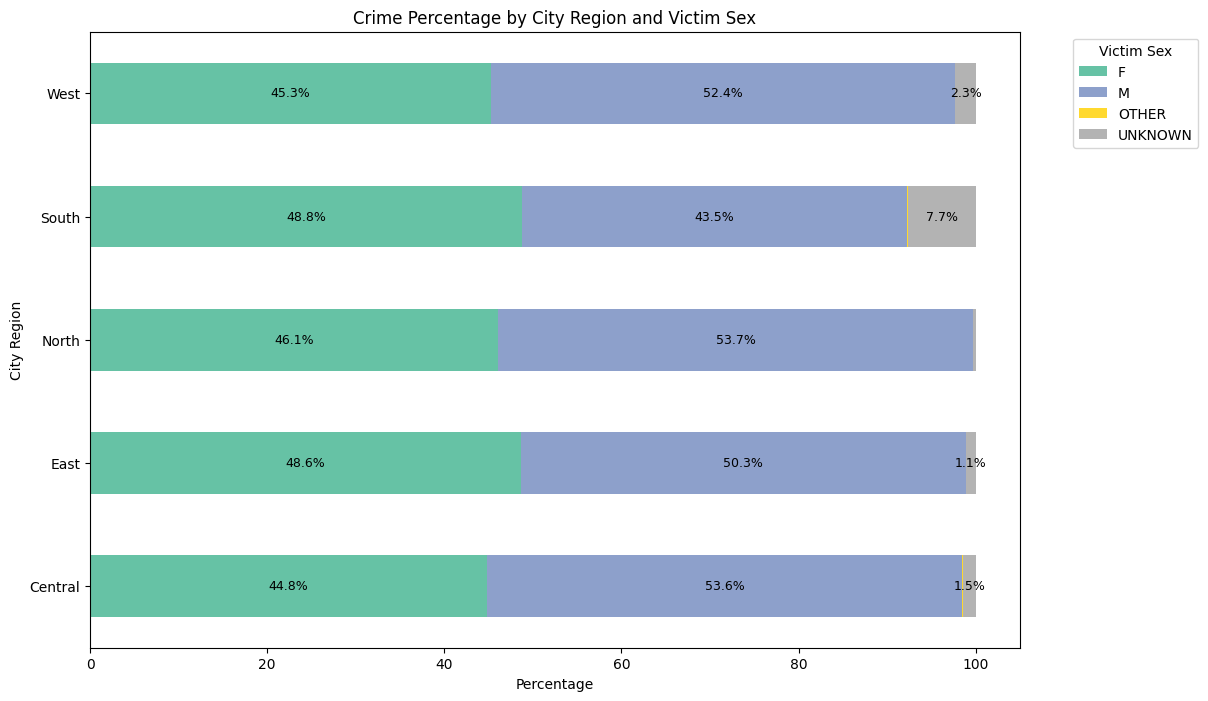

In [ ]:
# Replace value for clarity
df['Vict Sex'] = df['Vict Sex'].replace('X', 'UNKNOWN')
df['Vict Sex'] = df['Vict Sex'].replace('H', 'OTHER')

# Create pivot table: crimes by Area and Victim Sex (normalized for percentage)
pivot = pd.crosstab(df['City Region'], df['Vict Sex'], normalize='index') * 100

# Plot horizontal stacked bar chart
ax = pivot.plot(kind='barh', stacked=True, figsize=(12, 8), colormap='Set2')

# Add labels and title
plt.title('Crime Percentage by City Region and Victim Sex')
plt.xlabel('Percentage')
plt.ylabel('City Region')

# Add legend outside the plot for clarity
plt.legend(title='Victim Sex', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add percentage labels inside each stack
for bar in ax.containers:
    for patch in bar:
        width = patch.get_width()
        if width > 1:  # Only label if the segment is large enough to read
            ax.annotate(f'{width:.1f}%',
                        (patch.get_x() + width / 2, patch.get_y() + patch.get_height() / 2),
                        ha='center', va='center', fontsize=9, color='black')

# Optional: Save plot
plt.savefig('pict_crime_percentage_by_region_and_sex.png', dpi=300, bbox_inches='tight')

# Show plot
plt.show()


## Weapon Used by City Region

In [ ]:
df['Weapon Used Cd'].unique()
#df['Weapon Desc'].unique()

array(['NO WEAPON', 400.0, 500.0, 102.0, 511.0, 310.0, 109.0, 108.0,
       215.0, 211.0, 216.0, 512.0, 306.0, 200.0, 207.0, 515.0, 219.0,
       311.0, 305.0, 103.0, 201.0, 106.0, 307.0, 205.0, 304.0, 204.0,
       101.0, 308.0, 221.0, 218.0, 212.0, 107.0, 114.0, 208.0, 312.0,
       302.0, 122.0, 223.0, 301.0, 303.0, 503.0, 513.0, 113.0, 125.0,
       510.0, 104.0, 506.0, 206.0, 220.0, 502.0, 210.0, 217.0, 507.0,
       514.0, 112.0, 309.0, 124.0, 509.0, 111.0, 202.0, 115.0, 516.0,
       105.0, 203.0], dtype=object)

In [ ]:
# Ensure 'Weapon Used Cd' is treated as string (to safely extract the first character)
df['Weapon Used Cd'] = df['Weapon Used Cd'].astype(str)

# Extract the first digit (handle cases like 'NO WEAPON' if present)
df['Weapon First Digit'] = df['Weapon Used Cd'].str[0]

# Define mapping for the first digit to weapon category
weapon_mapping = {
    '1': 'Firearms',
    '2': 'Knives/Sharp Objects',
    '3': 'Physical Force/Hands/Feet',
    '4': 'Blunt Objects',
    '5': 'Chemicals/Explosives',
    '6': 'Other Weapons',
    'N': 'No Weapon',    # To catch cases where the code is 'NO WEAPON'
    '0': 'Unknown'       # In case there are codes starting with 0
}

# Apply the mapping to create the new 'Weapon' column
df['Weapon'] = df['Weapon First Digit'].map(weapon_mapping)

# Handle special case for 'NO WEAPON' or missing (optional cleanup)
df.loc[df['Weapon Used Cd'] == 'NO WEAPON', 'Weapon'] = 'No Weapon'

# Drop helper column if not needed
df = df.drop(columns=['Weapon First Digit'])

# Preview the result
print(df[['Weapon Used Cd', 'Weapon Desc', 'Weapon']].drop_duplicates().sort_values('Weapon Used Cd'))


      Weapon Used Cd                 Weapon Desc                Weapon
856            101.0                    REVOLVER              Firearms
21             102.0                    HAND GUN              Firearms
602            103.0                       RIFLE              Firearms
7108           104.0                     SHOTGUN              Firearms
36027          105.0     SAWED OFF RIFLE/SHOTGUN              Firearms
...              ...                         ...                   ...
3293           513.0                    STUN GUN  Chemicals/Explosives
22446          514.0                   TIRE IRON  Chemicals/Explosives
262            515.0           PHYSICAL PRESENCE  Chemicals/Explosives
31037          516.0  DOG/ANIMAL (SIC ANIMAL ON)  Chemicals/Explosives
1          NO WEAPON                   NO WEAPON             No Weapon

[64 rows x 3 columns]


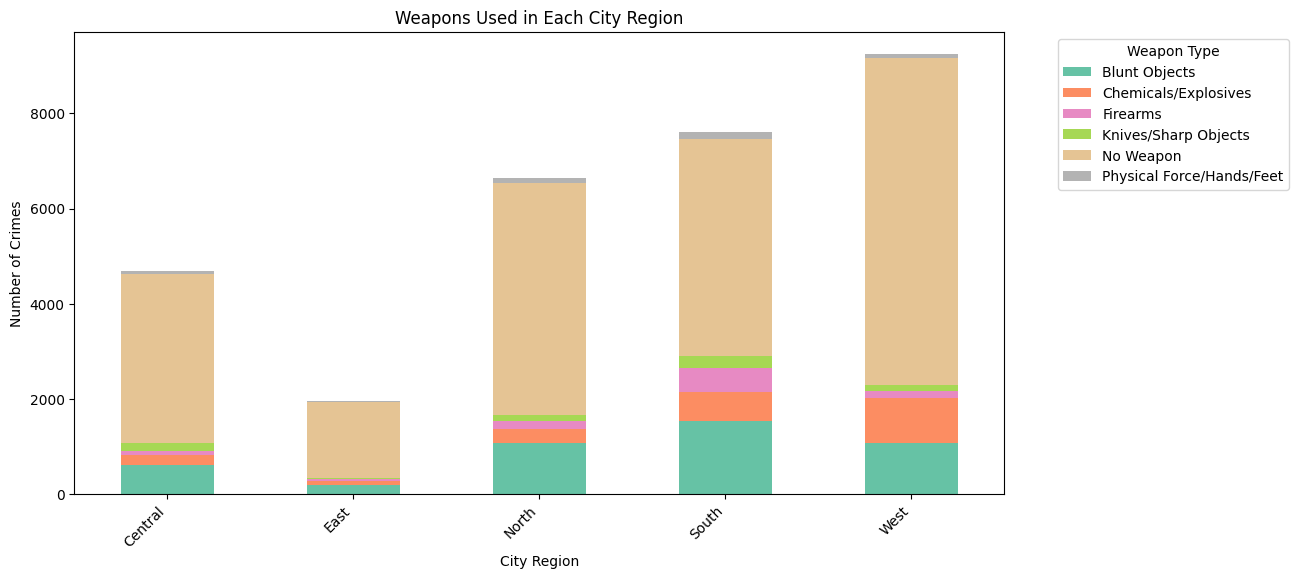

In [ ]:
# Create a crosstab to count the number of crimes by City Region and Weapon
pivot = pd.crosstab(df['City Region'], df['Weapon'])

# Plot the crosstab as a stacked bar chart
pivot.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set2')

# Add a title to describe what the chart shows
plt.title('Weapons Used in Each City Region')

# Label the y-axis to show it represents the number of crimes
plt.ylabel('Number of Crimes')

# Rotate x-axis labels (City Region names) for better readability
plt.xticks(rotation=45, ha='right')

# Place the legend outside the plot to avoid overlapping the bars
plt.legend(title='Weapon Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Save the chart as an image file (optional)
plt.savefig('pict_weapon_by_region.png', dpi=300, bbox_inches='tight')

# Display the chart
plt.show()


# Geolocation

In [ ]:
# Combine 'LAT' and 'LON' into 'LatLon'
df['LatLon'] = df['LAT'].astype(str) + ' ' + df['LON'].astype(str)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30133 entries, 1 to 50005
Data columns (total 35 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DR_NO           30133 non-null  int64         
 1   Date Rptd       30133 non-null  datetime64[ns]
 2   DATE OCC        30133 non-null  datetime64[ns]
 3   TIME OCC        30133 non-null  int64         
 4   AREA            30133 non-null  int64         
 5   AREA NAME       30133 non-null  object        
 6   Rpt Dist No     30133 non-null  int64         
 7   Part 1-2        30133 non-null  int64         
 8   Crm Cd          30133 non-null  int64         
 9   Crm Cd Desc     30133 non-null  object        
 10  Mocodes         30133 non-null  object        
 11  Vict Age        30133 non-null  int64         
 12  Vict Sex        30133 non-null  object        
 13  Vict Descent    30133 non-null  object        
 14  Premis Cd       30133 non-null  int64         
 15  Premis 